# **Keras 함수형 API를 이용한 DNN 구현**

- Keras 함수형 API는 tf.keras.Sequential API보다 더 유연한 모델을 생성하는 방법
- 함수형 API는 비선형 토폴로지, 공유 레이어, 심지어 여러 입력 또는 출력이 있는 모델을 처리할 수 있음

## **1. 함수형 API의 주요 개념**

- 딥 러닝 모델은 일반적으로 레이어의 DAG(directed acyclic graph)이다.
- 따라서 함수형 API는 레이어의 그래프를 빌드하는 방법이다.

## **2. 함수형 API를 이용하여 모델 빌드하기**

- 필요한 라이브러리 가져오기

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

- 세 개의 레이어가 있는 기본 그래프 모델
```
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```

- 먼저 입력 노드를 작성함
    - 데이터의 모양은 784 차원 벡터로 설정
    - 각 샘플의 모양만 지정되므로 배치 크기는 항상 생략

In [2]:
inputs = layers.Input(shape=(784,))

In [3]:
# (32, 32, 3) 모양의 이미지 입력이있는 경우
img_inputs = layers.Input(shape=(32, 32, 3))

- 리턴되는 inputs 에는 모델에 공급하는 입력 데이터의 모양 및 dtype 에 대한 정보가 포함됨

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
inputs.dtype

tf.float32

- inputs 객체에서 레이어를 호출하여 레이어 그래프에서 새 노드를 만듦
    - "레이어 호출" 동작은 "입력"에서 생성된 레이어로 화살표를 그리는 것과 동일함
    - 입력을 dense 레이어로 "전달"하고 x를 출력으로 가져옴

In [6]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

- 레이어 그래프에 출력을 위한 레이어 추가

In [7]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

- 레이어 그래프에서 입력 및 출력을 지정하여 Model 작성

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

- 모델 요약을 통해 모델 확인

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


- 그래프 플롯을 통해 모델을 확인하고자 한다면...

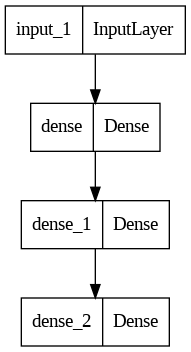

In [10]:
keras.utils.plot_model(model, "my_first_model.png")

- 선택적으로 플롯 된 그래프에 각 레이어의 입력 및 출력 모양을 표시하려면...
    - 이 그림과 코드는 거의 동일함
    - 코드 버전에서 연결 화살표는 호출 작업으로 대체

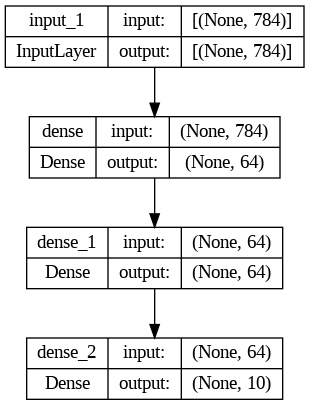

In [11]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

- 레이어 그래프는 딥 러닝 모델을 위한 직관적인 이미지
- 함수형 API는 이를 밀접하게 반영하는 모델을 만드는 방법임

## **3. 훈련, 평가 및 예측**

- 훈련(학습), 평가 및 예측(추론)은 Sequential 모델과 같이 함수형 API를 사용하여 빌드된 모델에 대해 같은 방식으로 작동함
- Model 클래스
    - 내장 훈련 루프(fit() 메서드) 제공
    - 내장 평가 루프(evaluate() 메서드)를 제공
    - 내장 추론 루프(predict() 메서드)를 제공
    - 이러한 루프를 사용자 정의하여 학습 루틴을 구현 가능

- MNIST 데이터셋으로 실습하기
    1. MNIST 이미지 데이터 로드
    2. 벡터로 재구성
    3. 데이터에 모델을 맞추기 (유효성 분할에서 성능을 모니터링하는 동안)
    4. 테스트 데이터를 이용하여 모델 평가

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/2
750/750 [==============================] - 9s 4ms/step - loss: 0.3543 - accuracy: 0.8984 - val_loss: 0.1896 - val_accuracy: 0.9442
Epoch 2/2
750/750 [==============================] - 4s 5ms/step - loss: 0.1671 - accuracy: 0.9504 - val_loss: 0.1414 - val_accuracy: 0.9572
313/313 - 1s - loss: 0.1354 - accuracy: 0.9596 - 575ms/epoch - 2ms/step
Test loss: 0.135380819439888
Test accuracy: 0.9595999717712402


## **4. 저장 및 직렬화**

- 저장 및 직렬화 작업
    - 함수형 API를 사용
    - 빌드된 모델에 대해 Sequential 모델을 사용할 때와 같은 방식으로 작동
    - 함수형 모델을 저장하는 표준 방법: model.save()를 호출하여 전체 모델을 단일 파일로 저장
    - 모델을 빌드한 코드를 더 이상 사용할 수 없는 경우에도 나중에 이 파일에서 같은 모델을 로드하여 다시 작성할 수 있음

- 저장된 파일에 포함되는 것
    - 모델 아키텍처
    - 모델 중량 값 (훈련 중 학습 된 값)
    - 모델 훈련 구성(있는 경우, compile로 전달)
    - 옵티마이저 및 상태(있는 경우, 중단한 곳에서 훈련을 다시 시작)

In [13]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

## **5. 같은 레이어 그래프를 사용하여 여러 모델 정의하기**

- 함수형 API에서 모델은 레이어 그래프에 입력 및 출력을 지정하여 생성됨
- 단일 레이어 그래프를 사용하여 여러 모델을 생성할 수 있음

- 예시
    - 이미지 입력을 16차원 벡터로 변환하는 encoder 모델과 훈련을 위한 엔드 투 엔드 autoencoder 모델
    - 같은 레이어 스택을 사용하여 두 모델을 인스턴스화
    - 디코딩 아키텍처는 인코딩 아키텍처와 완전하게 대칭이므로 출력 형상은 입력 형상 (28, 28, 1)과 같음
    - 디코더에서 인코더의 Conv2D 층과 반대되는 층은 Conv2DTranspose 층,  MaxPooling2D 층과 반대되는 층은 UpSampling2D 층

In [14]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

## **6. 모델 호출하기**

- 모든 모델은 레이어와 마찬가지로 호출이 가능함
- Input 또는 또 다른 레이어의 출력에서 모델을 호출함으로써 모델을 마치 레이어와 같이 취급할 수 있음
- 모델을 호출함으로써 모델의 아키텍처를 재사용할 뿐만 아니라 가중치도 재사용 할 수 있음

- 예시 (앞선 autoencoder 모델 예제에 대한 또 다른 설명)
    - 인코더 모델과 디코더 모델을 만들고
    - 두 번의 호출로 연결하여
    - 자동 인코더(autoencoder) 모델 만들기

In [15]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

- 모델은 레이어와 유사하므로
    - 모델은 중첩될 수 있음
    - 모델은 하위 모델을 포함할 수 있음
    - 모델 중첩의 일반적인 사용 사례는 앙상블 기법(ensembling)

- 예시
    - 모델 세트를 단일 모델로 앙상블하여 예측을 평균화하는 방법

In [16]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

## **7. 복잡한 그래프 토폴로지 조작하기**

### 7-1. 여러 입력 및 출력을 가진 모델

- 함수형 API를 사용하면 다중 입력 및 출력을 쉽게 조작할 수 있음
- Sequential API로는 처리할 수 ​​없음

### 7-2. 예시(1)

- 우선 순위별로 사용자 지정 발급 티켓 순위를 매기고 올바른 부서로 라우팅하는 시스템을 구축하는 경우
    - 세 가지의 입력
        - 티켓의 제목 (텍스트 입력)
        - 티켓의 본문 (텍스트 입력)
        - 사용자가 추가 한 모든 태그 (범주 입력)
    - 두 가지의 출력
        - 0과 1 사이의 우선 순위 점수 (스칼라 시그 모이 드 출력)
        - 티켓을 처리해야하는 부서 (부서 세트에 대한 softmax 출력)


In [17]:
num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(
    shape=(None,), name="title"
)
body_input = keras.Input(shape=(None,), name="body")
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name="priority")(x)
department_pred = layers.Dense(num_departments, name="department")(x)

model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

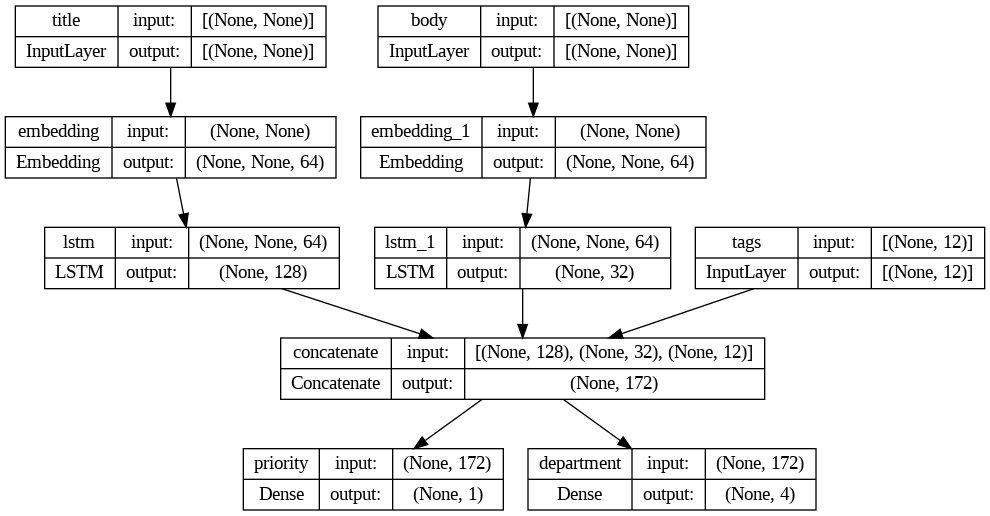

In [18]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

- 모델을 컴파일 할 때 각 출력에 서로 다른 손실을 할당 할 수 있음
- 각 손실에 다른 가중치를 할당하여 총 훈련 손실에 대한 기여도를 조정할 수 있음

In [19]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

- 출력 레이어의 이름이 다를 경우 손실과 손실 가중치를 레이어의 이름에 맞게 특정할 수 있음

In [20]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

- 입력 및 목표치의 NumPy 배열 목록을 전달하여 모델 훈련

In [21]:
import numpy as np

In [22]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 12s 179ms/step - loss: 1.2694 - priority_loss: 0.7016 - department_loss: 2.8388
Epoch 2/2
40/40 [==============================] - 3s 82ms/step - loss: 1.2635 - priority_loss: 0.6988 - department_loss: 2.8235


- Dataset 객체에 맞춰 호출할 때의 산출물
    - 리스트의 튜플 형태
        - ([title_data, body_data, tags_data], [priority_targets, dept_targets])
    - 딕셔너리의 튜플 형태
        - ({'title': title_data, 'body': body_data, 'tags': tags_data}, {'priority': priority_targets, 'department': dept_targets})

### 7-3. 예시(2)

- Toy ResNet 모델
    - 입력 및 출력이 여러 개인 모델 외에도 함수형 API를 사용하면 비선형 연결 토폴로지를 쉽게 조작할 수 있음
    - ResNet 모델은 순차적으로 연결되지 않은 레이어가 있는 모델이며 Sequential API가 처리할 수 없는 모델임
    - ToyRestNet 모델은 잔차 연결(residual connections)이 적용됨
    

In [23]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_9 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_8[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_9[0][0]']               
                                                                                         

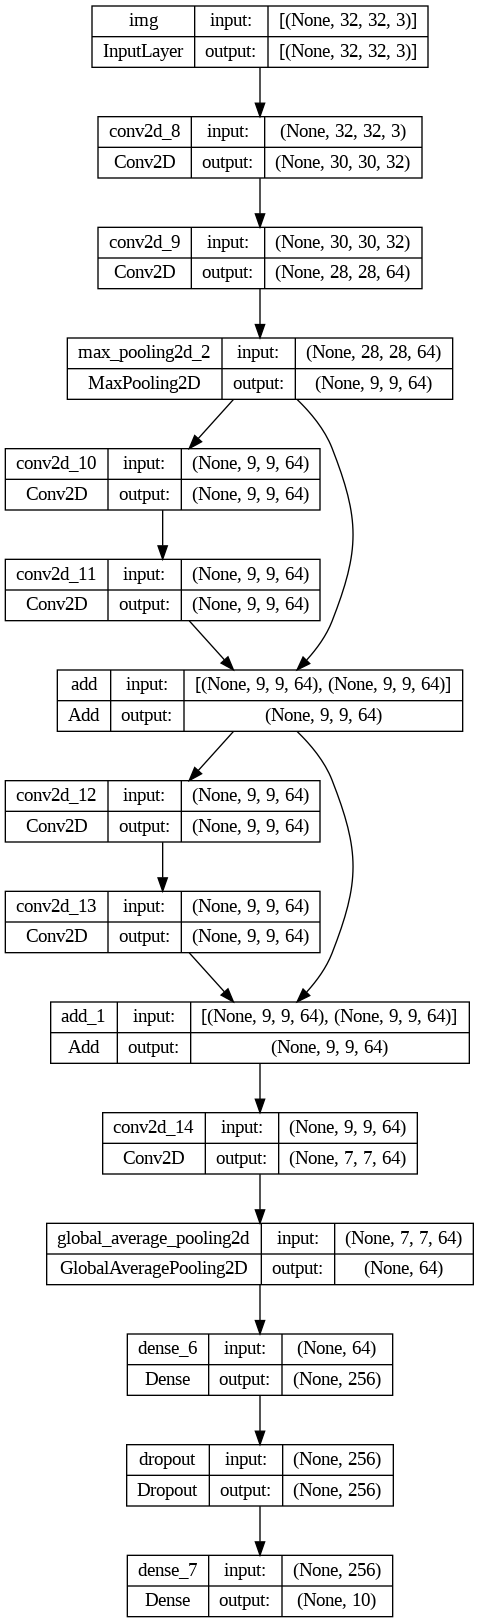

In [24]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

- CIFAR10 데이터셋을 적용하여 모델 훈련하기

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 9s 67ms/step - loss: 2.3041 - acc: 0.1025 - val_loss: 2.2931 - val_acc: 0.0800
